In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diamond dataset.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
10997,10998,0.90,Premium,E,VS1,62.3,56.0,4914,6.19,6.10,3.83
10998,10999,0.90,Good,G,VVS2,63.6,58.0,4914,6.11,6.10,3.88
10999,11000,0.90,Premium,D,VS2,62.6,59.0,4914,6.17,6.14,3.85
11000,11001,1.17,Good,I,SI1,63.6,61.0,4914,6.66,6.64,4.23


In [ ]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
10997,0.90,Premium,E,VS1,62.3,56.0,4914,6.19,6.10,3.83
10998,0.90,Good,G,VVS2,63.6,58.0,4914,6.11,6.10,3.88
10999,0.90,Premium,D,VS2,62.6,59.0,4914,6.17,6.14,3.85
11000,1.17,Good,I,SI1,63.6,61.0,4914,6.66,6.64,4.23


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11002 entries, 0 to 11001
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    11002 non-null  float64
 1   cut      11002 non-null  object 
 2   color    11002 non-null  object 
 3   clarity  11002 non-null  object 
 4   depth    11002 non-null  float64
 5   table    11002 non-null  float64
 6   price    11002 non-null  int64  
 7   x        11002 non-null  float64
 8   y        11002 non-null  float64
 9   z        11002 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 859.7+ KB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,11002.000000,11002.000000,11002.000000,11002.000000,11002.000000,11002.000000,11002.000000
mean,0.855811,61.861143,57.824905,3487.715052,6.008946,6.009345,3.715385
std,0.237441,1.642914,2.333451,1166.319720,0.664112,0.653940,0.421031
min,0.200000,43.000000,49.000000,326.000000,3.790000,3.750000,0.000000
25%,0.730000,61.000000,56.000000,3064.000000,5.790000,5.810000,3.570000
50%,0.900000,61.900000,58.000000,3722.000000,6.160000,6.170000,3.830000
75%,1.010000,62.700000,59.000000,4320.000000,6.430000,6.420000,3.990000
max,1.740000,71.800000,70.000000,4914.000000,7.620000,7.590000,4.870000


In [ ]:
df['price'].value_counts()

,count
price,
561,91
579,78
571,66
589,60
574,51
...,...
4621,1
4618,1
2778,1


In [ ]:
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
# df['carat']=df['carat'].round().astype(int)
# df

In [ ]:
# df['depth']=df['depth'].round().astype(int)
# df

In [ ]:
# df['table']=df['table'].round().astype(int)
# df

In [ ]:
# df['x']=df['x'].round().astype(int)
# df

In [ ]:
# df['y']=df['y'].round().astype(int)
# df

In [ ]:
# df["z"]=df["z"].round().astype(int)
# df

Encoding

In [ ]:
l=LabelEncoder()
df['cut']=l.fit_transform(df['cut'])
df['cut'].head()

,cut
0,2
1,3
2,1
3,3
4,1


In [ ]:
l=LabelEncoder()
df['clarity']=l.fit_transform(df['clarity'])
df['clarity'].head()

,clarity
0,3
1,2
2,4
3,5
4,3


In [ ]:
l=LabelEncoder()
df['color']=l.fit_transform(df['color'])
df['color'].head()

,color
0,1
1,1
2,1
3,5
4,6


In [ ]:
df.dtypes

,0
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
10997,0.90,3,1,4,62.3,56.0,4914,6.19,6.10,3.83
10998,0.90,1,3,7,63.6,58.0,4914,6.11,6.10,3.88
10999,0.90,3,0,5,62.6,59.0,4914,6.17,6.14,3.85
11000,1.17,1,5,2,63.6,61.0,4914,6.66,6.64,4.23


In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.shape

(11002, 10)

In [ ]:
df.isna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10997,False,False,False,False,False,False,False,False,False,False
10998,False,False,False,False,False,False,False,False,False,False
10999,False,False,False,False,False,False,False,False,False,False
11000,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


Target variable distribution

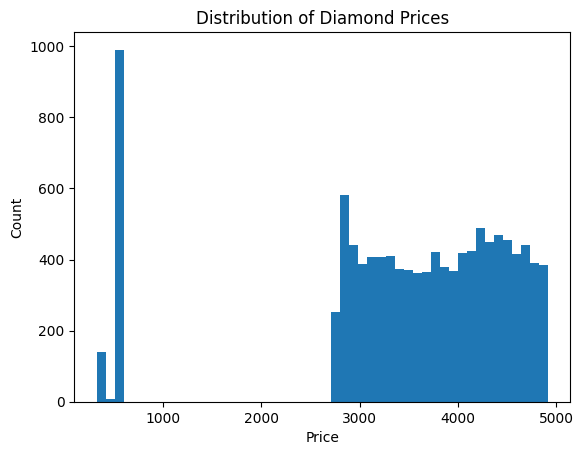

In [ ]:
plt.figure()
plt.hist(df["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Diamond Prices")
plt.show()

carat vs price

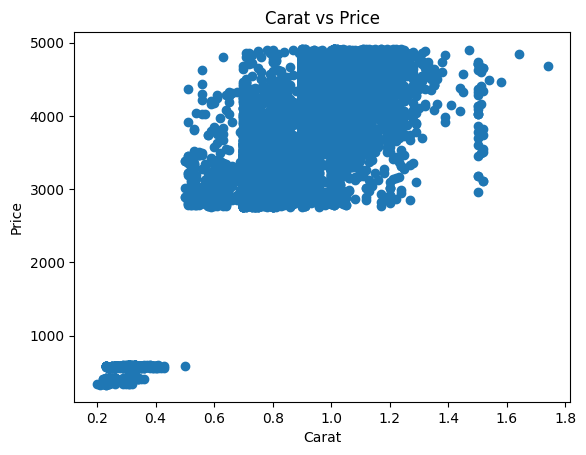

In [ ]:
plt.figure()
plt.scatter(df["carat"], df["price"])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat vs Price")
plt.show()


price vs cut

<Figure size 640x480 with 0 Axes>

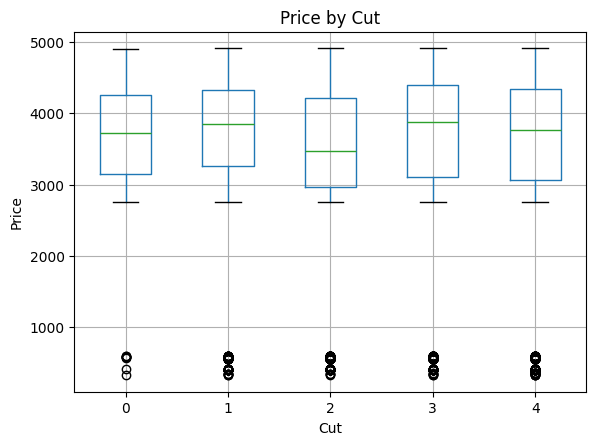

In [ ]:
plt.figure()
df.boxplot(column="price", by="cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.title("Price by Cut")
plt.suptitle("")
plt.show()

price vs color

<Figure size 640x480 with 0 Axes>

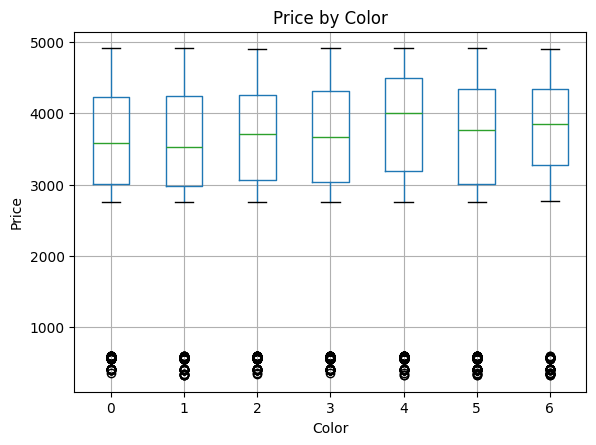

In [ ]:
plt.figure()
df.boxplot(column="price", by="color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.title("Price by Color")
plt.suptitle("")
plt.show()


price vs clarity

<Figure size 640x480 with 0 Axes>

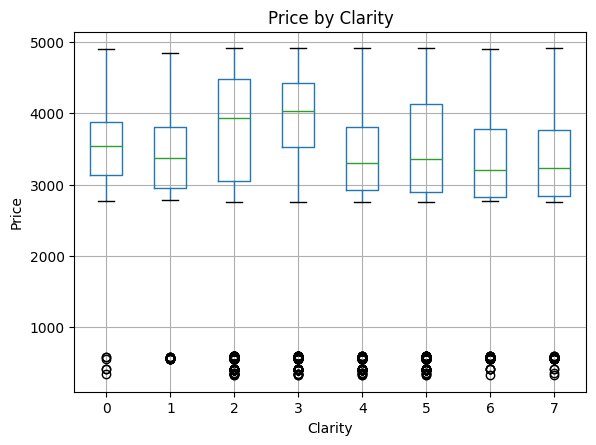

In [ ]:
plt.figure()
df.boxplot(column="price", by="clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.title("Price by Clarity")
plt.suptitle("")
plt.show()


Separate Feature and Target

In [ ]:
x= df.drop("price", axis=1).values
x



array([[0.23, 2.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 3.  , 1.  , ..., 3.89, 3.84, 2.31],
       [0.23, 1.  , 1.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.9 , 3.  , 0.  , ..., 6.17, 6.14, 3.85],
       [1.17, 1.  , 5.  , ..., 6.66, 6.64, 4.23],
       [1.22, 2.  , 4.  , ..., 6.88, 6.83, 4.24]])

In [ ]:
y=df["price"].values
y

array([ 326,  326,  327, ..., 4914, 4914, 4914])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[1.04, 2.  , 3.  , ..., 6.52, 6.49, 4.03],
       [1.01, 1.  , 1.  , ..., 6.31, 6.27, 4.04],
       [0.9 , 4.  , 0.  , ..., 6.14, 6.19, 3.77],
       ...,
       [0.3 , 3.  , 3.  , ..., 4.34, 4.31, 2.64],
       [0.9 , 3.  , 6.  , ..., 6.13, 6.03, 3.82],
       [1.04, 2.  , 3.  , ..., 6.53, 6.6 , 4.07]])

In [ ]:
y_train

array([4752, 4032, 4381, ...,  574, 2871, 4200])

Scaling

In [ ]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.7726501 , -0.46218514,  0.20815523, ...,  0.76733327,
         0.73239975,  0.7430214 ],
       [ 0.64616576, -1.33658141, -0.93077804, ...,  0.4506366 ,
         0.39562117,  0.76670553],
       [ 0.18238982,  1.28660739, -1.50024468, ...,  0.1942631 ,
         0.27315623,  0.12723393],
       ...,
       [-2.34729709,  0.41221112,  0.20815523, ..., -2.52027977,
        -2.60476982, -2.54907313],
       [ 0.18238982,  0.41221112,  1.91655513, ...,  0.17918231,
         0.02822635,  0.2456546 ],
       [ 0.7726501 , -0.46218514,  0.20815523, ...,  0.78241406,
         0.90078904,  0.83775793]])

In [ ]:
y_train

array([4752, 4032, 4381, ...,  574, 2871, 4200])

Model Creation

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Prediction

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([3361.11723808,   96.88870161, 4089.34887966, ..., 4016.04273123,
       4182.44056464,  722.07960095])

Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 354.4071863646942
MSE: 198887.39262047262
RMSE: 445.96792779354956
R2 Score: 0.8558310271869349


In [ ]:
comparison_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,2761,3361.117238
1,414,96.888702
2,3550,4089.348880
3,4174,3891.714873
4,3799,4045.097677
...,...,...
2196,561,620.556499
2197,3149,3572.157935
2198,4135,4016.042731
2199,4812,4182.440565


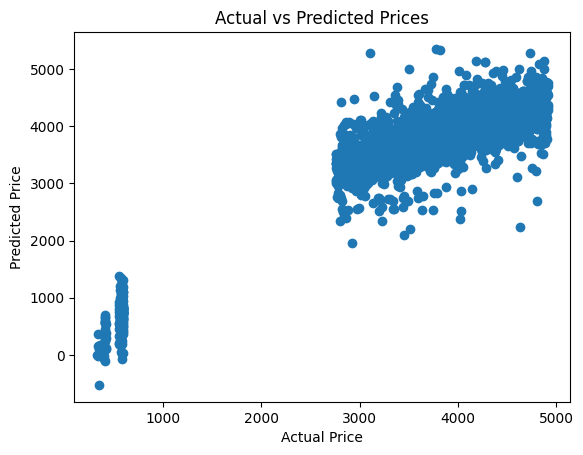

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
new_diamond = pd.DataFrame({
    "carat": [0],
    "cut": [2],
    "color": [1],
    "clarity": [3],
    "depth": [62],
    "table": [55],
    "x": [4],
    "y": [4],
    "z": [2]
})



In [ ]:
predicted_price = model.predict(new_diamond)
print("Predicted Price:", predicted_price)


Predicted Price: [14989.88991061]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
